## Integrantes:
- Paola Flores
- Mario Rivera

In [23]:
# """
# CORRER SOLO UNA VEZ, ES PARA DESCOMPRIMIR EL ARCHIVO BD.ZIP
# """

# import zipfile
# import os

# # Directorio donde se extraerán los archivos
# current_directory = os.getcwd()
# # Ruta del archivo .zip
# zip_path = os.path.join(current_directory, 'BD.zip')

# # Descomprimir en el directorio actual 
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(current_directory)

# print(f'Archivos extraídos en: {current_directory}')

## Pre-procesamiento

In [24]:
import cv2
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

directorio_texturas = 'BD'
print(f'Directorio de texturas: {directorio_texturas}')

resultados = []


for folder in sorted(os.listdir(directorio_texturas)):
    
    folder_path = os.path.join(directorio_texturas, folder)

    if os.path.isdir(directorio_texturas):
        for image_name in os.listdir(folder_path):
            
            image_path = os.path.join(folder_path, image_name)
            print(f"Procesando imagen: {image_name} del folder: {folder}")
            image = cv2.imread(f'{image_path}')
            
            features = ['contrast', 'energy', 'ASM', 'homogeneity', 'correlation', 'dissimilarity']
            ft_map = {
                "contrast": "Contraste",
                "energy": "Energía",
                "ASM": "ASM",
                "homogeneity": "Homogeneidad",
                "correlation": "Correlación",
                "dissimilarity": "Disimilaridad"
            }
            
            # Diccionario para almacenar resultados en formato de columnas
            resultados_fila = {'Carpeta': folder, 'Imagen': image_name}
            
            # Para los descriptores de los canales RGB
            canales = cv2.split(image)  # Separar los canales RGB
            nombres_canales = ['R', 'G', 'B']
            for canal, nombre_canal in zip(canales, nombres_canales):
                glcm = graycomatrix(canal, 
                                    distances=[1],
                                    angles=[0],
                                    levels=256,
                                    symmetric=False,
                                    normed=False)

                # Guardar los valores de cada descriptor como columnas separadas
                for ft in features:
                    if ft in ft_map:
                        ft_values = float(graycoprops(glcm, ft))
                        # Crear columnas como 'Contraste R', 'Energía R', etc.
                        resultados_fila[f'{ft_map[ft]} {nombre_canal}'] = ft_values
            
            # Para los descriptores de la imagen en escala de grises
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, 
                                distances=[1],
                                angles=[0],
                                levels=256,
                                symmetric=False,
                                normed=False)
            
            # Guardar los valores de descriptores de la imagen en escala de grises
            for ft in features:
                if ft in ft_map:
                    ft_values = float(graycoprops(glcm, ft))
                    # Crear columnas como 'Contraste Gray', 'Energía Gray', etc.
                    resultados_fila[f'{ft_map[ft]} Gray'] = ft_values
            
            # Añadir la fila con todos los descriptores para esta imagen
            resultados.append(resultados_fila)


Directorio de texturas: BD
Procesando imagen: c264-1_1.jpg del folder: textura_01
Procesando imagen: c264-1_10.jpg del folder: textura_01
Procesando imagen: c264-1_11.jpg del folder: textura_01
Procesando imagen: c264-1_12.jpg del folder: textura_01
Procesando imagen: c264-1_13.jpg del folder: textura_01
Procesando imagen: c264-1_14.jpg del folder: textura_01
Procesando imagen: c264-1_15.jpg del folder: textura_01
Procesando imagen: c264-1_16.jpg del folder: textura_01
Procesando imagen: c264-1_17.jpg del folder: textura_01
Procesando imagen: c264-1_18.jpg del folder: textura_01
Procesando imagen: c264-1_19.jpg del folder: textura_01
Procesando imagen: c264-1_2.jpg del folder: textura_01
Procesando imagen: c264-1_20.jpg del folder: textura_01
Procesando imagen: c264-1_21.jpg del folder: textura_01
Procesando imagen: c264-1_22.jpg del folder: textura_01
Procesando imagen: c264-1_23.jpg del folder: textura_01
Procesando imagen: c264-1_24.jpg del folder: textura_01
Procesando imagen: c264

In [25]:


df_resultados = pd.DataFrame(resultados)

df_resultados = df_resultados.sort_values(by=['Carpeta', 'Imagen'])
display(df_resultados)

,Carpeta,Imagen,Contraste R,Energía R,ASM R,Homogeneidad R,Correlación R,Disimilaridad R,Contraste G,Energía G,...,ASM B,Homogeneidad B,Correlación B,Disimilaridad B,Contraste Gray,Energía Gray,ASM Gray,Homogeneidad Gray,Correlación Gray,Disimilaridad Gray
0,textura_01,c264-1_1.jpg,73.323855,0.018066,0.000326,0.169128,0.979387,6.281124,73.770297,0.018069,...,0.000337,0.170204,0.979984,6.256659,72.717783,0.018293,0.000335,0.171963,0.980319,6.228369
1,textura_01,c264-1_10.jpg,72.781012,0.017860,0.000319,0.173032,0.981427,6.227181,74.116916,0.017814,...,0.000330,0.171987,0.981730,6.235149,72.961799,0.018043,0.000326,0.173632,0.982020,6.217028
2,textura_01,c264-1_11.jpg,76.484996,0.017620,0.000310,0.164916,0.979709,6.426490,78.772112,0.017553,...,0.000324,0.164605,0.979713,6.489189,77.661157,0.017840,0.000318,0.165036,0.980337,6.454249
3,textura_01,c264-1_12.jpg,76.417462,0.018037,0.000325,0.168423,0.979401,6.384723,78.983727,0.017892,...,0.000335,0.167323,0.979493,6.453896,77.875534,0.018150,0.000329,0.168246,0.979917,6.428627
4,textura_01,c264-1_13.jpg,70.783791,0.017601,0.000310,0.170655,0.978225,6.198731,72.177847,0.017474,...,0.000316,0.170540,0.978840,6.224145,71.334667,0.017650,0.000312,0.171135,0.979125,6.213735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,textura_10,a642-1_50.jpg,57.154394,0.021075,0.000444,0.188819,0.968014,5.484064,58.563711,0.020279,...,0.000525,0.190765,0.957554,5.397799,56.971165,0.021180,0.000449,0.189475,0.967332,5.470538
496,textura_10,a642-1_6.jpg,128.699791,0.015942,0.000254,0.142701,0.957545,8.007679,130.106410,0.015499,...,0.000306,0.144921,0.937677,7.891277,127.797301,0.016098,0.000259,0.142745,0.954123,7.979663
497,textura_10,a642-1_7.jpg,116.381349,0.016112,0.000260,0.149712,0.963461,7.545719,117.530137,0.015580,...,0.000314,0.150912,0.945628,7.449253,115.539647,0.016187,0.000262,0.149514,0.960402,7.515871
498,textura_10,a642-1_8.jpg,102.844980,0.016882,0.000285,0.155776,0.964791,7.192000,103.627984,0.016480,...,0.000349,0.156866,0.944865,7.105847,102.051550,0.017143,0.000294,0.155840,0.961583,7.158731


In [26]:
df_resultados.describe()

,Contraste R,Energía R,ASM R,Homogeneidad R,Correlación R,Disimilaridad R,Contraste G,Energía G,ASM G,Homogeneidad G,...,ASM B,Homogeneidad B,Correlación B,Disimilaridad B,Contraste Gray,Energía Gray,ASM Gray,Homogeneidad Gray,Correlación Gray,Disimilaridad Gray
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,123.500572,0.022126,0.000560,0.175592,0.936818,7.410997,125.916337,0.021195,0.000526,0.174647,...,0.000562,0.175109,0.936337,7.429215,124.602059,0.021490,0.000540,0.176130,0.938157,7.428759
std,98.265373,0.008377,0.000453,0.064397,0.051537,3.163647,99.503661,0.008760,0.000478,0.066786,...,0.000501,0.065834,0.050902,3.211639,99.380076,0.008823,0.000486,0.067689,0.051291,3.210980
min,8.937269,0.010937,0.000120,0.064650,0.743754,2.134667,8.823855,0.010264,0.000105,0.064748,...,0.000109,0.068068,0.745449,2.121317,8.765928,0.010311,0.000106,0.065093,0.745386,2.113237
25%,61.940406,0.016206,0.000263,0.132436,0.908752,5.513141,64.440474,0.015578,0.000243,0.130280,...,0.000263,0.130576,0.912407,5.478490,61.612321,0.015813,0.000250,0.130932,0.910245,5.483329
50%,94.292827,0.019146,0.000367,0.170051,0.960511,6.497880,98.732193,0.017975,0.000323,0.169372,...,0.000341,0.170354,0.953054,6.623422,96.512016,0.018295,0.000335,0.170712,0.959197,6.590112
75%,139.880329,0.027257,0.000743,0.222190,0.974806,8.380570,143.535779,0.025462,0.000648,0.221918,...,0.000739,0.221754,0.976962,8.392321,141.112586,0.026307,0.000692,0.224361,0.978780,8.398647
max,476.392594,0.050418,0.002542,0.404480,0.994417,16.445478,485.563165,0.049961,0.002496,0.401655,...,0.003791,0.398011,0.990189,16.498554,481.990217,0.055087,0.003035,0.406928,0.992369,16.537815


In [27]:
            
from sklearn.preprocessing import StandardScaler
columnas = ["Contraste R", "Energía R", "ASM R", "Homogeneidad R", "Correlación R", "Disimilaridad R",
            "Contraste G", "Energía G", "ASM G", "Homogeneidad G", "Correlación G", "Disimilaridad G",
            "Contraste B", "Energía B", "ASM B", "Homogeneidad B", "Correlación B", "Disimilaridad B",
            "Contraste Gray", "Energía Gray", "ASM Gray", "Homogeneidad Gray", "Correlación Gray", "Disimilaridad Gray"]

df_unscaled = df_resultados.copy()
scaler = StandardScaler()
df_resultados[columnas] = scaler.fit_transform(df_resultados[columnas])

display(df_resultados)

,Carpeta,Imagen,Contraste R,Energía R,ASM R,Homogeneidad R,Correlación R,Disimilaridad R,Contraste G,Energía G,...,ASM B,Homogeneidad B,Correlación B,Disimilaridad B,Contraste Gray,Energía Gray,ASM Gray,Homogeneidad Gray,Correlación Gray,Disimilaridad Gray
0,textura_01,c264-1_1.jpg,-0.511136,-0.485043,-0.515518,-0.100471,0.826821,-0.357500,-0.524586,-0.357184,...,-0.448914,-0.074575,0.858318,-0.365462,-0.522602,-0.362768,-0.422412,-0.061626,0.822854,-0.374213
1,textura_01,c264-1_10.jpg,-0.516666,-0.509711,-0.531914,-0.039787,0.866440,-0.374568,-0.521099,-0.386267,...,-0.464446,-0.047466,0.892659,-0.372166,-0.520144,-0.391103,-0.441121,-0.036944,0.856048,-0.377749
2,textura_01,c264-1_11.jpg,-0.478934,-0.538404,-0.550749,-0.165942,0.833072,-0.311505,-0.474268,-0.416044,...,-0.476062,-0.159710,0.852990,-0.292987,-0.472810,-0.414121,-0.456129,-0.164069,0.823189,-0.303797
3,textura_01,c264-1_12.jpg,-0.479622,-0.488624,-0.517910,-0.111431,0.827078,-0.324721,-0.472140,-0.377318,...,-0.453912,-0.118382,0.848666,-0.303987,-0.470651,-0.378930,-0.433114,-0.116601,0.814999,-0.311785
4,textura_01,c264-1_13.jpg,-0.537011,-0.540709,-0.552251,-0.076734,0.804249,-0.383570,-0.540606,-0.425162,...,-0.492078,-0.069466,0.835830,-0.375596,-0.536533,-0.435642,-0.470008,-0.073873,0.799545,-0.378776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,textura_10,a642-1_50.jpg,-0.675850,-0.125611,-0.255233,0.205614,0.605913,-0.609696,-0.677564,-0.104647,...,-0.074171,0.238048,0.417225,-0.633150,-0.681209,-0.035225,-0.187475,0.197350,0.569395,-0.610462
496,textura_10,a642-1_6.jpg,0.052963,-0.738855,-0.675217,-0.511269,0.402575,0.188795,0.042152,-0.650816,...,-0.510973,-0.459006,0.026348,0.144015,0.032184,-0.611759,-0.578014,-0.493709,0.311604,0.171741
497,textura_10,a642-1_7.jpg,-0.072522,-0.718563,-0.663183,-0.402281,0.517490,0.042627,-0.084365,-0.641571,...,-0.495383,-0.367910,0.182715,0.006245,-0.091281,-0.601622,-0.572067,-0.393600,0.434139,0.027157
498,textura_10,a642-1_8.jpg,-0.210413,-0.626596,-0.607044,-0.308020,0.543326,-0.069292,-0.224220,-0.538728,...,-0.424800,-0.277375,0.167696,-0.100787,-0.227139,-0.493230,-0.506418,-0.300051,0.457193,-0.084179


## Selección de características
Usamos Plus L = 2 y Take Away R = 1

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")

X = df_resultados[columnas]
y = df_resultados['Carpeta']

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA maximiza el índice de Fisher
lda = LDA()

best_k_features = None
best_accuracy = 0
best_selected_features = None

# Plus L = 2 y Take Away R = 1
L = 2 
R = 1 

current_k = L

iter_caract = []

# Ciclo de Plus L, Take Away R
while current_k <= 24:  # Definir un máximo de características seleccionadas (6)
    print(f"Prueba de {current_k} características iniciales (SFS)")

    # Vamos agregando características (Plus L)
    sfs = SFS(lda, 
              k_features=current_k,  # Vamos cambiando el número de características de forma creciente para encontrar el mejor
              forward=True, 
              floating=False, 
              scoring='accuracy', 
              cv=5)  # Validación cruzada
    
    sfs = sfs.fit(X_train, y_train)

    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Entrenamos y predecimos
    lda.fit(X_train_sfs, y_train)
    y_pred_sfs = lda.predict(X_test_sfs)

    # Calcularmos accuracy como medida de desempeño
    test_accuracy_sfs = accuracy_score(y_test, y_pred_sfs)

    selected_feature_names = list(sfs.k_feature_names_)

    print(f"Características seleccionadas con SFS: {selected_feature_names}")
    print(f"Precisión de validación cruzada con SFS: {sfs.k_score_}")
    print(f"Precisión en conjunto de prueba con SFS: {test_accuracy_sfs}")


    X_train_numpy = X_train.to_numpy() # para poder seleccionar solo las columnas de SFS en las siguientes lineas (X_train_sfs_subset y X_test_sfs_subset)
    X_test_numpy = X_test.to_numpy()

    # Aplicamos SBS sobre las características seleccionadas por SFS
    selected_features_indices = list(sfs.k_feature_idx_)
    X_train_sfs_subset = X_train_numpy[:, selected_features_indices]  # Subset con las características seleccionadas por SFS
    X_test_sfs_subset = X_test_numpy[:, selected_features_indices]   
    
    sbs = SFS(lda,
              k_features=(current_k - R),  # Reducimos el número de características en R cada vez
              forward=False,  # Ahora hacemos SBS
              floating=False, 
              scoring='accuracy', 
              cv=5)

    sbs = sbs.fit(X_train_sfs_subset, y_train)

    X_train_sbs = sbs.transform(X_train_sfs_subset)
    X_test_sbs = sbs.transform(X_test_sfs_subset)

    # Entrenamos y predecimos con el modelo ajustado por SBS
    lda.fit(X_train_sbs, y_train)
    y_pred_sbs = lda.predict(X_test_sbs)

    # Recalculamos accuracy con SBS
    test_accuracy_sbs = accuracy_score(y_test, y_pred_sbs)

    # Mapear los índices de SBS a los nombres de las características originales
    sbs_feature_indices = list(sbs.k_feature_idx_)
    sbs_feature_names = [selected_feature_names[i] for i in sbs_feature_indices]

    print(f"Características seleccionadas con SBS (después de SFS): {sbs_feature_names}")
    print(f"Precisión de validación cruzada con SBS: {sbs.k_score_}")
    print(f"Precisión en conjunto de prueba con SBS: {test_accuracy_sbs}")


    # Guardamos los resultados de la iteración en un diccionario
    iter_caract.append({
        'k_features': current_k,
        'selected_features_sfs': sfs.k_feature_names_,
        'selected_features_sbs': sbs.k_feature_names_,
        'cross_val_score_sfs': sfs.k_score_,
        'cross_val_score_sbs': sbs.k_score_,
        'test_accuracy_sfs': test_accuracy_sfs,
        'test_accuracy_sbs': test_accuracy_sbs
    })

    # Vamos comparando y guardamos el mejor resultado entre SFS + SBS
    if test_accuracy_sbs > best_accuracy:
        best_k_features = current_k
        best_accuracy = test_accuracy_sbs
        best_selected_features = sbs_feature_names

    print("-" * 50)

    # Siguiente iteración +L (plus L)
    current_k += L
    




Prueba de 2 características iniciales (SFS)
Características seleccionadas con SFS: ['Homogeneidad G', 'Homogeneidad B']
Precisión de validación cruzada con SFS: 0.7025
Precisión en conjunto de prueba con SFS: 0.56
Características seleccionadas con SBS (después de SFS): ['Homogeneidad B']
Precisión de validación cruzada con SBS: 0.43
Precisión en conjunto de prueba con SBS: 0.3
--------------------------------------------------
Prueba de 4 características iniciales (SFS)
Características seleccionadas con SFS: ['Energía G', 'Homogeneidad G', 'Homogeneidad B', 'Homogeneidad Gray']
Precisión de validación cruzada con SFS: 0.8875
Precisión en conjunto de prueba con SFS: 0.79
Características seleccionadas con SBS (después de SFS): ['Energía G', 'Homogeneidad B', 'Homogeneidad Gray']
Precisión de validación cruzada con SBS: 0.8575000000000002
Precisión en conjunto de prueba con SBS: 0.74
--------------------------------------------------
Prueba de 6 características iniciales (SFS)
Característ

In [29]:
# Resultados finales
print(f"Mejor número de características: {len(best_selected_features)}")
print(f"Mejor precisión: {best_accuracy}")
print(f"Mejores características seleccionadas: {best_selected_features}")

Mejor número de características: 15
Mejor precisión: 0.94
Mejores características seleccionadas: ['Contraste R', 'ASM R', 'Correlación R', 'Disimilaridad R', 'Energía G', 'ASM G', 'Homogeneidad G', 'Correlación G', 'Disimilaridad G', 'Contraste B', 'Homogeneidad B', 'Correlación B', 'Disimilaridad B', 'Homogeneidad Gray', 'Disimilaridad Gray']


In [30]:
['Carpeta', 'Imagen'] + best_selected_features

['Carpeta',
 'Imagen',
 'Contraste R',
 'ASM R',
 'Correlación R',
 'Disimilaridad R',
 'Energía G',
 'ASM G',
 'Homogeneidad G',
 'Correlación G',
 'Disimilaridad G',
 'Contraste B',
 'Homogeneidad B',
 'Correlación B',
 'Disimilaridad B',
 'Homogeneidad Gray',
 'Disimilaridad Gray']

In [31]:
columnas_red_dim = ['Carpeta', 'Imagen'] + best_selected_features



df_red_dim = df_resultados[columnas_red_dim]
display(df_red_dim)

df_unscaled = df_unscaled[columnas_red_dim] #para el último ítem

,Carpeta,Imagen,Contraste R,ASM R,Correlación R,Disimilaridad R,Energía G,ASM G,Homogeneidad G,Correlación G,Disimilaridad G,Contraste B,Homogeneidad B,Correlación B,Disimilaridad B,Homogeneidad Gray,Disimilaridad Gray
0,textura_01,c264-1_1.jpg,-0.511136,-0.515518,0.826821,-0.357500,-0.357184,-0.417287,-0.054337,0.791446,-0.374783,-0.513437,-0.074575,0.858318,-0.365462,-0.061626,-0.374213
1,textura_01,c264-1_10.jpg,-0.516666,-0.531914,0.866440,-0.374568,-0.386267,-0.436407,-0.041546,0.823697,-0.375380,-0.512102,-0.047466,0.892659,-0.372166,-0.036944,-0.377749
2,textura_01,c264-1_11.jpg,-0.478934,-0.550749,0.833072,-0.311505,-0.416044,-0.455702,-0.166992,0.793361,-0.302714,-0.459778,-0.159710,0.852990,-0.292987,-0.164069,-0.303797
3,textura_01,c264-1_12.jpg,-0.479622,-0.517910,0.827078,-0.324721,-0.377318,-0.430553,-0.109093,0.783192,-0.311129,-0.460193,-0.118382,0.848666,-0.303987,-0.116601,-0.311785
4,textura_01,c264-1_13.jpg,-0.537011,-0.552251,0.804249,-0.383570,-0.425162,-0.461553,-0.073575,0.767955,-0.381055,-0.528797,-0.069466,0.835830,-0.375596,-0.073873,-0.378776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,textura_10,a642-1_50.jpg,-0.675850,-0.255233,0.605913,-0.609696,-0.104647,-0.239859,0.189304,0.604995,-0.603299,-0.693835,0.238048,0.417225,-0.633150,0.197350,-0.610462
496,textura_10,a642-1_6.jpg,0.052963,-0.675217,0.402575,0.188795,-0.650816,-0.597873,-0.497370,0.387860,0.181313,0.005823,-0.459006,0.026348,0.144015,-0.493709,0.171741
497,textura_10,a642-1_7.jpg,-0.072522,-0.663183,0.517490,0.042627,-0.641571,-0.592608,-0.391700,0.496570,0.033255,-0.110465,-0.367910,0.182715,0.006245,-0.393600,0.027157
498,textura_10,a642-1_8.jpg,-0.210413,-0.607044,0.543326,-0.069292,-0.538728,-0.532201,-0.290552,0.530649,-0.081695,-0.239570,-0.277375,0.167696,-0.100787,-0.300051,-0.084179


## Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Separar las características (X) y la etiqueta (y)
# Asumimos que 'Carpeta' es la etiqueta, y 'Imagen' no es relevante para el modelo
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador Naive Bayes
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

# Calculamos y mostramos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador Naive Bayes: {accuracy:.2f}")

f1_nb = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score de Naive Bayes: {f1_nb:.2f}")


Precisión del clasificador Naive Bayes: 0.83
F1 Score de Naive Bayes: 0.80


## Árbol de decisión

Precisión del clasificador de Árbol de Decisión: 0.85
F1 Score de Árbol de Decisión: 0.84


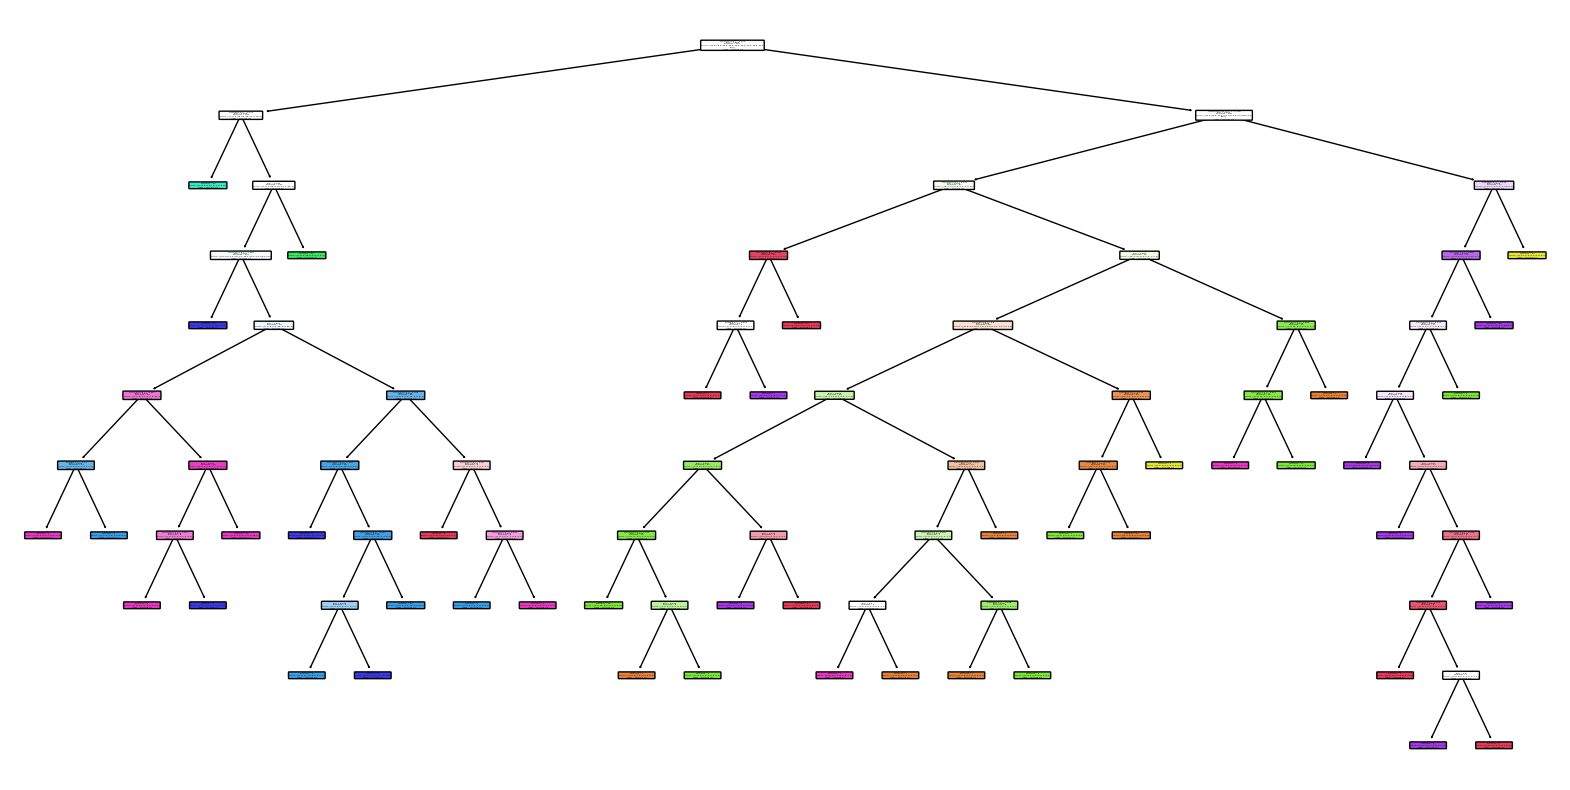

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Usando el dataframe 'df_red_dim' para entrenar el clasificador de árbol de decisión

# Separar las características (X) y la etiqueta (y)
# Asumimos que 'Carpeta' es la etiqueta, y 'Imagen' no es relevante para el modelo
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de árbol de decisión
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# Calculamos y mostramos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador de Árbol de Decisión: {accuracy:.2f}")

f1_tree = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score de Árbol de Decisión: {f1_tree:.2f}")


# Graficamos el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Usando el dataframe 'df_red_dim' para entrenar el clasificador KNN con K=5

# Separar las características (X) y la etiqueta (y)
# Asumimos que 'Carpeta' es la etiqueta, y 'Imagen' no es relevante para el modelo
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador KNN con K=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Validación cruzada con 5 particiones (5-Fold Cross Validation)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

knn_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Calculamos y mostramos la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador KNN (K=5) en conjunto de prueba: {accuracy:.2f}")

# Mostramos los resultados de validación cruzada
print(f"Precisión de validación cruzada (5-Fold): {cv_scores}")
print(f"Precisión promedio de validación cruzada: {cv_scores.mean():.2f}")

f1_knn = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score de KNN: {f1_knn:.2f}")


Precisión del clasificador KNN (K=5) en conjunto de prueba: 0.94
Precisión de validación cruzada (5-Fold): [0.84285714 0.9        0.85714286 0.88571429 0.91428571]
Precisión promedio de validación cruzada: 0.88
F1 Score de KNN: 0.93


## También lo hicimos en pipelines, como dice en la rúbrica

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from numpy.linalg import inv



# Separar las características (X) y las etiquetas (y)
X = df_red_dim.drop(columns=['Carpeta', 'Imagen'])
y = df_red_dim['Carpeta']

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Creamos un diccionario para los clasificadores con parámetros ajustados
clasificadores = {
    'Naive Bayes': {
        'pipeline': Pipeline([
            ('modelo', GaussianNB())
        ]),
        'param_grid': {
            # En Naive Bayes no tenemos hiperparámetros que ajustar para mejorar rendimiento
        }
    },
    'Árbol de Decisión': {
        'pipeline': Pipeline([
            ('modelo', DecisionTreeClassifier(random_state=42))
        ]),
        'param_grid': {
            'modelo__max_depth': [3, 5, 9, 10, 11],  # Buscamos a cuanto ajustar la profundidad del árbol
            'modelo__min_samples_split': [2, 5, 8, 9, 10],  # Tamaño mínimo de muestras para dividir un nodo
            'modelo__min_samples_leaf': [1, 2, 3, 4]  # Tamaño mínimo de muestras para hacer una hoja
        }
    },
    'KNN': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),  # Normalizamos
            ('modelo', KNeighborsClassifier())
        ]),
        'param_grid': {
            'modelo__n_neighbors': [5, 7, 8, 9],  # Número de vecinos (K)
            'modelo__metric': ['euclidean', 'manhattan']  # Distancia 
        }
    }
}

# Entrenar y evaluar cada clasificador con validación cruzada
resultados = {}
for nombre, config in clasificadores.items():
    pipeline = config['pipeline']
    param_grid = config['param_grid']
    
    if param_grid:
        # Usaremos GridSearchCV para ajustar los hiperparámetros y usamos el F1-Score 
        # tenemos la validación cruzada con cv = 5
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        mejor_modelo = grid_search.best_estimator_
        mejor_params = grid_search.best_params_
    else:
        # Sin parámetros para ajustar (es el caso que tenemos con Naive Bayes)
        pipeline.fit(X_train, y_train)
        mejor_modelo = pipeline
        mejor_params = "Sin busqueda"

    # Validación cruzada con el mejor modelo
    cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring='f1_macro')
    y_pred = mejor_modelo.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    resultados[nombre] = {
        'Mejores parámetros': mejor_params,
        'CV Mean Accuracy': cv_scores.mean(),
        'Test Accuracy': accuracy,
        'F1 Score': f1
    }

    # Mostrar resultados por clasificador
    print(f"\nResultados para {nombre}:")
    print(f" - Mejores parámetros: {mejor_params}")
    print(f" - Precisión promedio de validación cruzada: {cv_scores.mean():.2f}")
    print(f" - Precisión en el conjunto de prueba: {accuracy:.2f}")
    print(f" - F1 Score en el conjunto de prueba: {f1:.2f}")




Resultados para Naive Bayes:
 - Mejores parámetros: Sin busqueda
 - Precisión promedio de validación cruzada: 0.79
 - Precisión en el conjunto de prueba: 0.83
 - F1 Score en el conjunto de prueba: 0.80

Resultados para Árbol de Decisión:
 - Mejores parámetros: {'modelo__max_depth': 9, 'modelo__min_samples_leaf': 2, 'modelo__min_samples_split': 9}
 - Precisión promedio de validación cruzada: 0.86
 - Precisión en el conjunto de prueba: 0.85
 - F1 Score en el conjunto de prueba: 0.84

Resultados para KNN:
 - Mejores parámetros: {'modelo__metric': 'euclidean', 'modelo__n_neighbors': 5}
 - Precisión promedio de validación cruzada: 0.88
 - Precisión en el conjunto de prueba: 0.94
 - F1 Score en el conjunto de prueba: 0.93


## Rendimientos

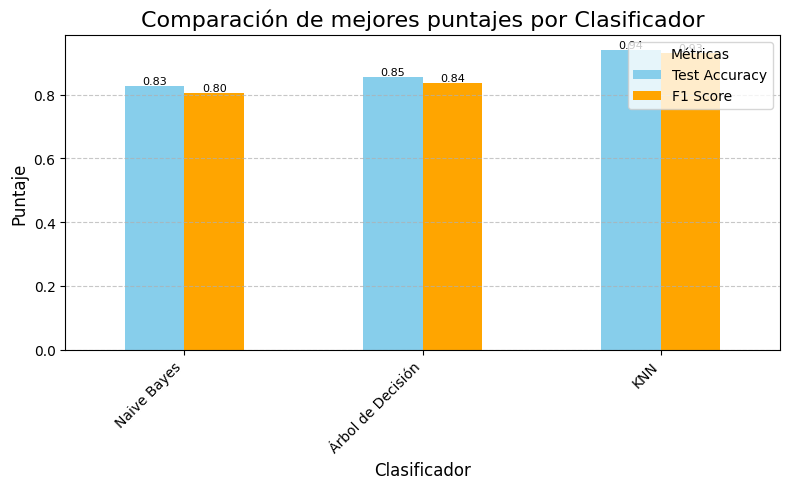

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Convertir los puntajes a un DataFrame
df_puntajes = pd.DataFrame(resultados).T

fig, ax = plt.subplots(figsize=(8, 5))

df_puntajes[['Test Accuracy', 'F1 Score']].plot(kind='bar', ax=ax, color=['skyblue', 'orange'])


for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.text(
    rect.get_x() + rect.get_width() / 2,  
    height,  
    f'{height:.2f}', 
    ha='center',
    va='bottom',
    fontsize=8  
        )


ax.set_title('Comparación de mejores puntajes por Clasificador', fontsize=16)
ax.set_ylabel('Puntaje', fontsize=12)
ax.set_xlabel('Clasificador', fontsize=12)
ax.set_xticklabels(df_puntajes.index, rotation=45, ha='right')
ax.legend(title='Métricas', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Con estos resultados, nos damos cuenta de que para el conjunto de datos que tenemos, el mejor modelo a utilizar es KNN. Usamos distancia euclidiana, 5 vecinos y pesos uniformes.

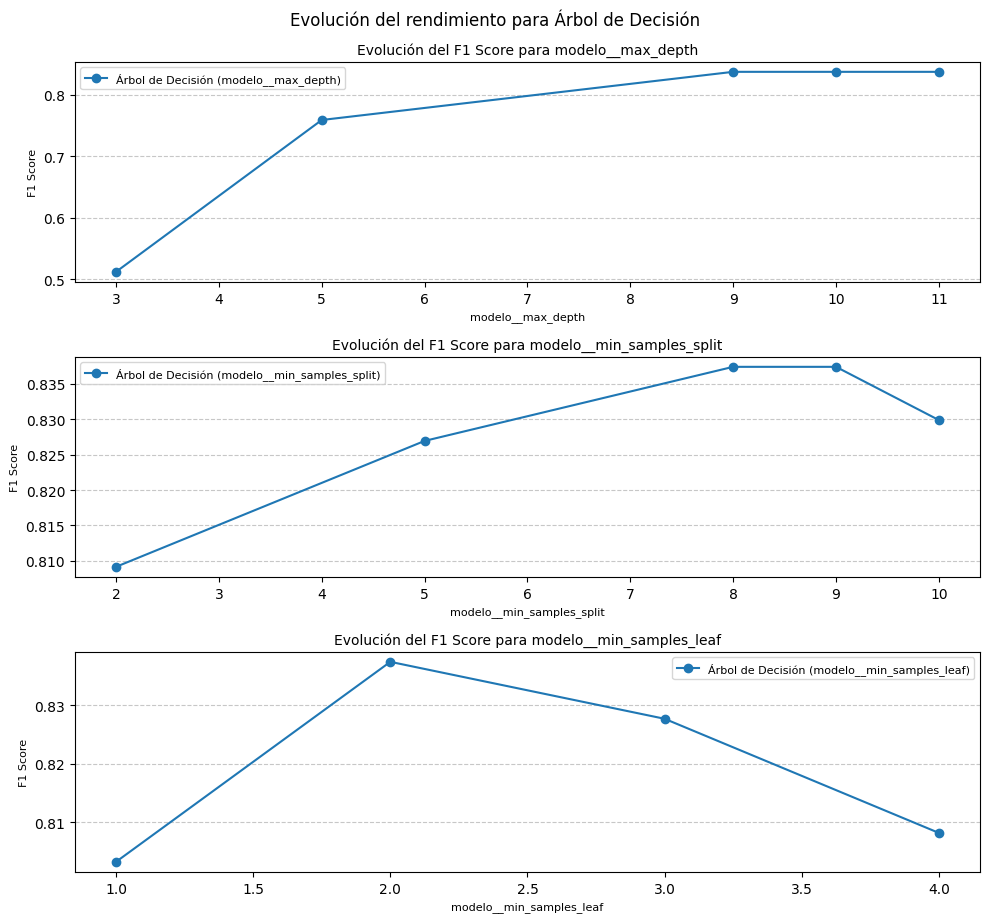

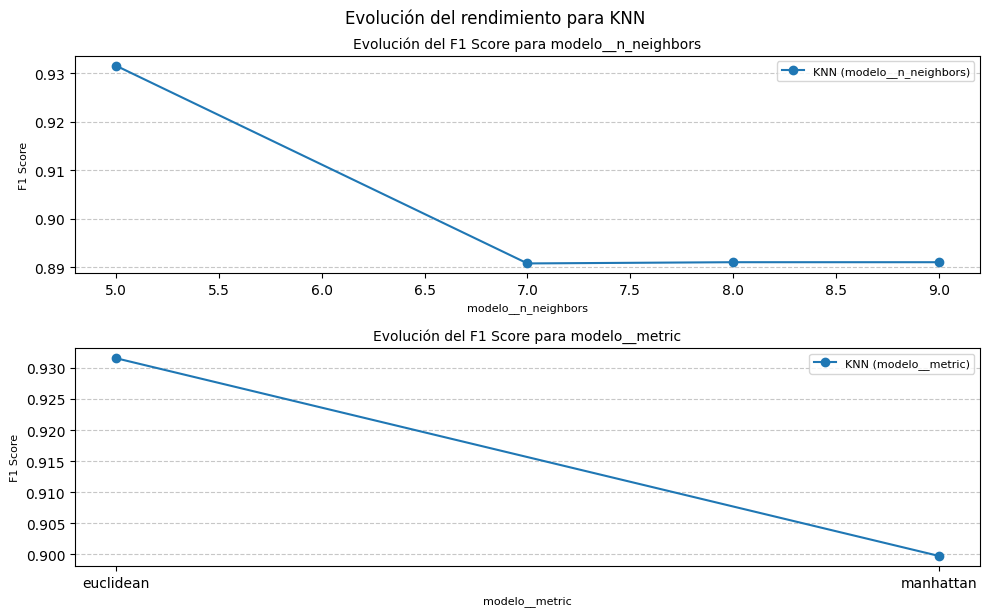

In [ ]:
# Iteramos sobre los clasificadores y mantenemos los valores óptimos constantes
for nombre, config in clasificadores.items():
    if config['param_grid']:
        param_grid = config['param_grid']
        pipeline = config['pipeline']

        # Recuperamos los mejores parámetros calculados previamente
        mejores_params = resultados[nombre]['Mejores parámetros']
        if mejores_params == "Sin busqueda":
            print(f"El clasificador {nombre} no tiene hiperparámetros ajustables.")
            continue

        pipeline.set_params(**mejores_params)

        param_names = list(param_grid.keys())
        plt.figure(figsize=(10, len(param_names) * 3))

        for i, param_name in enumerate(param_names):
            param_values = param_grid[param_name]
            scores = []

            for value in param_values:
                # Ajustamos el pipeline con el parámetro actual, manteniendo los óptimos constantes
                current_params = mejores_params.copy()  # Hacemos una copia para no modificar el original
                current_params[param_name] = value
                pipeline.set_params(**current_params)
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)

                # Calculamos el F1 Score para cada configuración de parámetro
                f1 = f1_score(y_test, y_pred, average='macro')
                scores.append(f1)

            # Graficamos la evolución del F1 Score
            plt.subplot(len(param_names), 1, i + 1)
            plt.plot(param_values, scores, marker='o', linestyle='-', label=f'{nombre} ({param_name})')
            plt.title(f'Evolución del F1 Score para {param_name}', fontsize=10)
            plt.xlabel(param_name, fontsize=8)
            plt.ylabel('F1 Score', fontsize=8)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.legend(fontsize=8)
            plt.tight_layout()

        plt.suptitle(f'Evolución del rendimiento para {nombre}', fontsize=12, y=1.02)
        plt.show()



En el árbol de decisión, observamos que el rendimiento mejora al aumentar la profundidad, estabilizándose en 9. Sin embargo, una profundidad excesita puede causar sobreajuste, ya que el modelo empieza a aprender detalles específicos y ruido del conjunto de entrenamiento, lo cual afecta la generalización. Para evitar esto es útil emplear validación cruzada para identificar la profundidad óptima, maximizando el rendimiento. Con respecto al mínimo de muestras para dividir los nodos, el rendimiento mejora al aumentar hasta 9, donde se alcanza el óptimo. Finalmente, para el mínimo de muestras por hoja, encontramos que un valor muy bajo hace que el árbol sea demasiado complejo y esto implica en un sobreajuste, mientras que un valor muy alto simplifica demasiado el árbol, incrementando el sesgo. El valor óptimo se encontró en 2.




En KNN, al aumentar la cantidad de vecinos, el rendimiento empeora, probablemente debido a que algunos datos son similares y el modelo se confunde al aumentar K. Un valor más alto de K incrementa el sesgo y reduce la varianza, haciendo que el modelo sea menos sensible a patrones locales. La distancia Euclidiana parece ser más adecuada en este caso, debido a que la estructura de los datos tienen características con magnitudes homogéneas, lo que nos permite priorizar su uso frente a la distancia de Manhattan.

En el caso de Naive Bayes, no tenemos parámetros que analizar, ya que no variamos ninguno.

## Sin normalizar

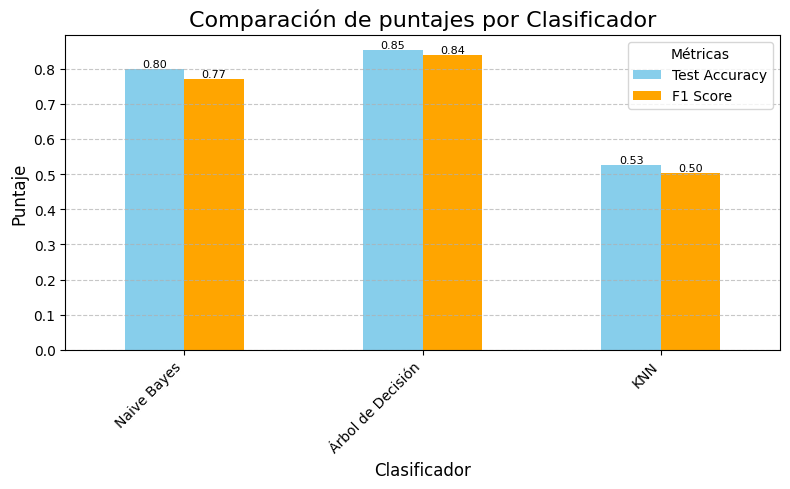

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

# Supongamos que df_unscaled ya está cargado en el entorno

# Selección de las características (X) y las etiquetas (y)
X = df_unscaled.drop(columns=['Carpeta', 'Imagen'])
y = df_unscaled['Carpeta']

# División de los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

resultados_nuevos = {}

## NAIVE BAYES (sin búsqueda de parámetros, usando el modelo por defecto)
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# Calculamos las métricas
f1_nb_un = f1_score(y_test, y_pred, average='macro')
accuracy_nb_un = accuracy_score(y_test, y_pred)
resultados_nuevos['Naive Bayes'] = {'Test Accuracy': accuracy_nb_un, 'F1 Score': f1_nb_un}

## Árbol de Decisión (con los parametros encontrados)
dt_classifier = DecisionTreeClassifier(random_state=42, 
                                       max_depth=9, 
                                       min_samples_leaf=2, 
                                       min_samples_split=9)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

f1_tree_un = f1_score(y_test, y_pred, average='macro')
accuracy_tree_un = accuracy_score(y_test, y_pred)
resultados_nuevos['Árbol de Decisión'] = {'Test Accuracy': accuracy_tree_un, 'F1 Score': f1_tree_un}

## KNN (con los parametros encontrados)
knn_classifier = KNeighborsClassifier(n_neighbors=5, 
                                      metric='euclidean')

# Realizamos validación cruzada (cv = 5)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

f1_knn_un = f1_score(y_test, y_pred, average='macro')
accuracy_knn_un = accuracy_score(y_test, y_pred)
resultados_nuevos['KNN'] = {'Test Accuracy': accuracy_knn_un, 'F1 Score': f1_knn_un}

# Convertimos los resultados en un DataFrame para graficar
df_puntajes_new = pd.DataFrame(resultados_nuevos).T

fig, ax = plt.subplots(figsize=(8, 5))

df_puntajes_new[['Test Accuracy', 'F1 Score']].plot(kind='bar', ax=ax, color=['skyblue', 'orange'])


for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.text(
    rect.get_x() + rect.get_width() / 2,  
    height,  
    f'{height:.2f}',  
    ha='center',
    va='bottom',
    fontsize=8  
        )

ax.set_title('Comparación de puntajes por Clasificador', fontsize=16)
ax.set_ylabel('Puntaje', fontsize=12)
ax.set_xlabel('Clasificador', fontsize=12)
ax.set_xticklabels(df_puntajes_new.index, rotation=45, ha='right')
ax.legend(title='Métricas', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Al no normalizar, la conclusión más importante que notamos es que el rendimiento de KNN baja considerablemente, ya que como sabemos, si las escalas son muy diferentes entre las características de los datos, las magnitudes más grandes ponderarán más en el cálculo de la distancia, haciendo que el algoritmo se equivoque en la clasificación.